Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

#Support Vector Regression using synthetic data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Create a nonlinear function

In [ ]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [ ]:
n_samples = 1000
n_features = 6

In [ ]:
x = 6*np.random.rand(n_samples,n_features)

In [ ]:
y = nonlinear(x)+np.random.randn(n_samples)

In [ ]:
y=y.reshape(n_samples,1)

In [ ]:
print(x)

[[4.47970262 3.38270177 2.22288903 4.91913965 1.31684894 2.74400948]
 [4.17735969 4.20122323 1.80987051 2.31782394 3.88157381 3.58955674]
 [0.64843227 5.80892075 1.90149555 3.18578371 4.83983841 2.73950009]
 ...
 [2.97447765 4.10622219 2.98953669 1.96868959 4.14919761 1.32328665]
 [2.02037083 5.95684173 2.81339108 5.55235149 2.8706835  1.14997628]
 [4.6823358  1.02882595 1.37626784 3.15143747 2.00892524 0.32923037]]


In [ ]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe
column_values = ['ip_feature_1','ip_feature_2','ip_feature_3','ip_feature_4','ip_feature_5','ip_feature_6']
df_synthetic = pd.DataFrame(data = x, columns = column_values )
df_synthetic['y'] = y
df_synthetic

,ip_feature_1,ip_feature_2,ip_feature_3,ip_feature_4,ip_feature_5,ip_feature_6,y
0,4.479703,3.382702,2.222889,4.919140,1.316849,2.744009,0.906521
1,4.177360,4.201223,1.809871,2.317824,3.881574,3.589557,3.621147
2,0.648432,5.808921,1.901496,3.185784,4.839838,2.739500,-0.462859
3,1.581272,1.375642,0.566972,5.678506,2.022913,4.879130,-0.503595
4,1.994410,2.968774,5.201714,2.021441,0.752825,2.940877,0.627055
...,...,...,...,...,...,...,...
995,3.949109,5.716370,4.811385,0.937464,0.254125,5.685775,2.562974
996,3.667279,4.151407,2.918006,1.822941,5.993797,4.988938,2.903735
997,2.974478,4.106222,2.989537,1.968690,4.149198,1.323287,3.445992
998,2.020371,5.956842,2.813391,5.552351,2.870684,1.149976,-0.116898


Plot the data - Uncomment the following cell

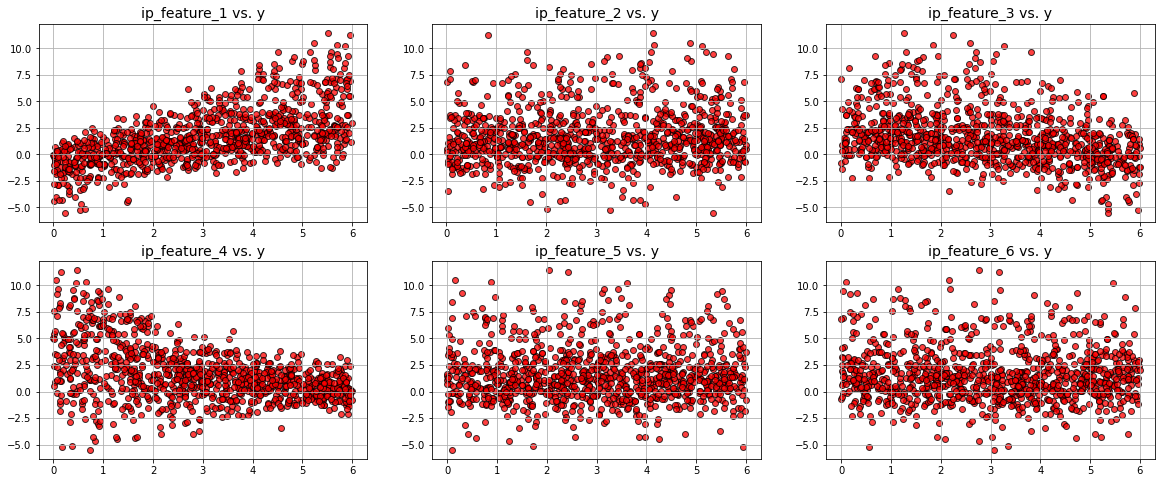

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
ax = ax.ravel()
for i in range(6):
   ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['y'],edgecolor='k',color='red',alpha=0.75)
   ax[i].set_title(f"{df_synthetic.columns[i]} vs. y",fontsize=14)
   ax[i].grid(True)
plt.show()

In [ ]:
# Add code below

# Perform test train split of the dataframe 'df_synthetic'
#0.2 i.e. 20% of the data is test data. and 0.8 i.e. 80% of the data = training data 
# train_test_split takes numpy array as ip.

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Support vector regressor with linear kernel

In [ ]:
Y_train.shape

(800, 1)

In [ ]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset

from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, Y_train)


SVR(kernel='linear')

In [ ]:
#Predicting the test set result  

y_pred = regressor.predict(X_test)

In [ ]:
y_pred.shape

(200,)

In [ ]:
# Add code below
# Display the R2 score

r2Score_svr = r2_score(Y_test,y_pred)
print('R2 Score of SVR(kernal = linear) = {}'.format(r2Score_svr*100))

R2 Score of SVR(kernal = linear) = 59.45803703977701


In [ ]:
# Add code below

# Build a linear regressor on the above dataset and report its R2 score

model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred_test=model.predict(X_test)
r2Score_lr = r2_score(Y_test,Y_pred_test)

print('R2 Score of Linear Regression Model = {}'.format(r2Score_lr*100))

R2 Score of Linear Regression Model = 60.211611494489105


##Support vector regressor with RBF kernel

#####For a non-linear regression, the kernel function transforms the data to a higher dimensional and performs the linear separation. Here we will use the rbf kernel.

In [ ]:
#Add code below

# Use RBF kernel with default values and perform support vector regression
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [ ]:
# Add code below
# Report R2 score of the above model

r2Score_rbf = r2_score(Y_test,y_pred)
print('R2 Score of SVR (kernal = rbf) = {}'.format(r2Score_rbf*100))


R2 Score of SVR (kernal = rbf) = 75.21843028270732


In [ ]:
# Add code below

# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR

grid = GridSearchCV( estimator=SVR(kernel='rbf'),
                     param_grid={ 'C': [1.1, 5.4, 170, 1001],
                                  'epsilon': [0.003, 0.07, 0.019, 0.0019, 0.14],
                                  'gamma': ['scale']
                     }, cv=5, scoring='r2', verbose=0, n_jobs=-1 )
grid.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.1, 5.4, 170, 1001],
                         'epsilon': [0.003, 0.07, 0.019, 0.0019, 0.14],
                         'gamma': ['scale']},
             scoring='r2')

In [ ]:
# Check best model by the grid search and display it
print("The best parameters are: ", grid.best_params_)

best parameters are:  {'C': 5.4, 'epsilon': 0.019, 'gamma': 'scale'}


In [ ]:
# Add code below

# Fit that model to the data and check the R2 score
prediction = grid.predict(X_test)
r2Score_rbf_optimize = r2_score(Y_test,prediction)
print('R2 Score of SVR (rbf Optimized) = {}'.format(r2Score_rbf_optimize*100))

R2 Score of SVR (rbf Optimized) = 75.65137631668848


In [ ]:
# initialize data of lists.
data = {'Model': ['SVR (linear)', 'LR', 'SVR (rbf)', 'SVR (rbf_optimize)'],
        'R2_Score': [r2Score_svr*100, r2Score_lr*100, r2Score_rbf*100, r2Score_rbf_optimize*100]}
  
table = pd.DataFrame(data, index=['1)', '2)','3)','4)'])
table

,Model,R2_Score
1),SVR (linear),59.458037
2),LR,60.211611
3),SVR (rbf),75.218430
4),SVR (rbf_optimize),75.651376
